In [37]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [38]:
data = pd.read_csv("fccbcc.csv")
print(data.shape)
data.head
data.type.value_counts()

(414, 3)


1    216
0    198
Name: type, dtype: int64

In [39]:
x = data[['q4','q6']].values


y = data['type'].values

                       
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=200)
print(x_train.shape, y_train.shape)
#print(x_test)


(289, 2) (289,)


In [40]:
logreg = LogisticRegression(solver='liblinear',penalty='l1',C=10)
logreg.fit(x_train, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [41]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.53


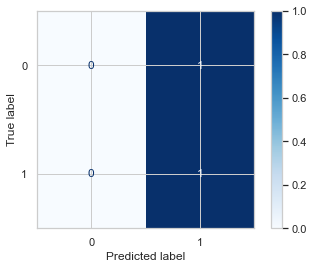

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Predict the test set
predictions = logreg.predict(x_test)

# Generate confusion matrix
matrix = plot_confusion_matrix(logreg, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
#plt.title('Confusion matrix for our classifier')
plt.show(matrix)
plt.show()

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        59
           1       0.53      1.00      0.69        66

    accuracy                           0.53       125
   macro avg       0.26      0.50      0.35       125
weighted avg       0.28      0.53      0.36       125



/home/ashish/snap/jupyter/common/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


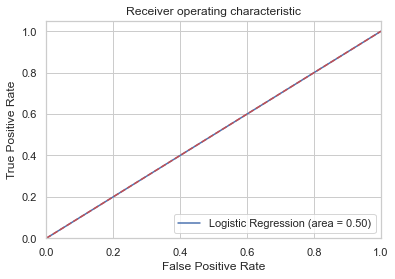

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:, 1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [45]:
logreg.fit(x_train, y_train).score(x_train, y_train)


0.5190311418685121

In [46]:
logreg.fit(x_test, y_test).score(x_test, y_test)


0.528